-68 , 78


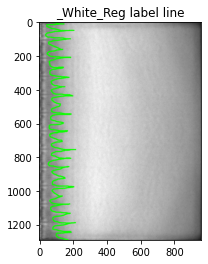

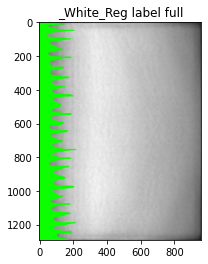

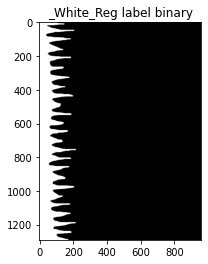

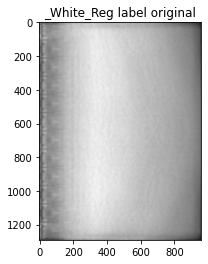

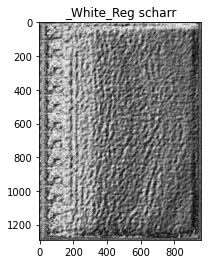

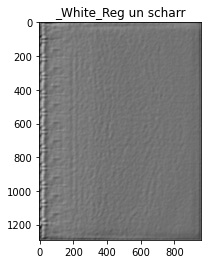

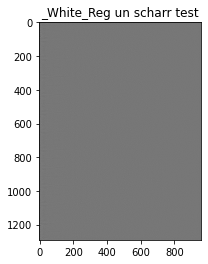

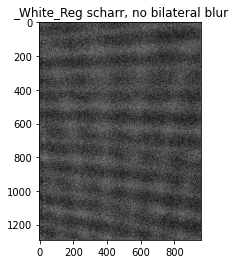

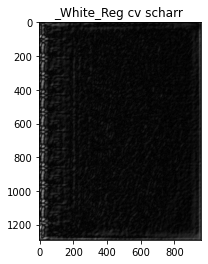

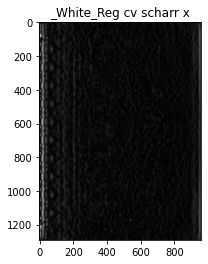

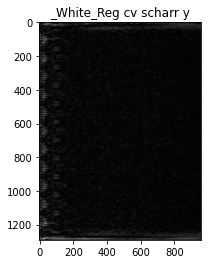

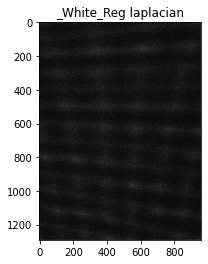

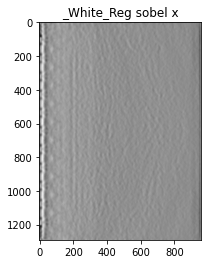

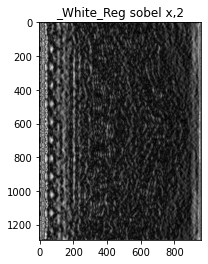

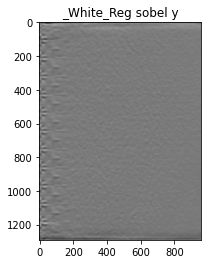

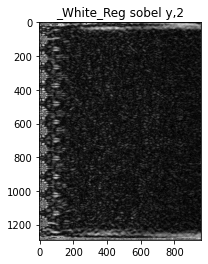

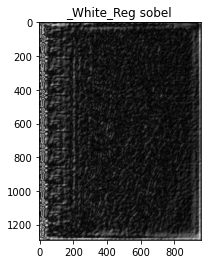

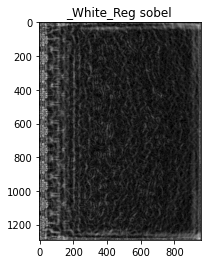

In [60]:
import cv2 as cv
import glob, os
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

#labels =  '/Users/estepark/Documents/week9_tues/label'
annotations = '/Users/estepark/Documents/week11_mon/Vermouth_HVT/2018-09-10 D HVT HG8A/20180910/Data/HiResMesh/label'
#originals = '/Users/estepark/Documents/week11_mon/Vermouth_HVT/2018-09-10 D HVT HG8A/20180910/Data/HiResMesh/results'
kern = [[0, 1,  0], [1, 0, -1],[ 0, -1 ,0]]
kernX = [[0, 1,  0], [1, 0, -1],[ 0, -1 ,0]]
kernY = [[0, 1,  0], [1, 0, -1],[ 0, -1 ,0]]
kernL = [[0,1,0],[1,-4,1],[0,1,0]]


for fname in glob.glob(annotations+'/*.png'):
    serNum = fname.split('/')[-1][:-4] 
    
    annotation  = cv.imread(fname) # green line annotated label
    annotation_full = np.copy(annotation)
    annotation_binary = np.zeros(annotation.shape[:2])
    
    for i in range(annotation.shape[0]): 
        for j in range(annotation.shape[1])[::-1]:
            if annotation[i][j][0] == annotation[i][j][1] == annotation[i][j][2]:
                continue
            else:
                annotation_full[i][0:j][:] = annotation_full[i][j][:]
                annotation_binary[i][0:j] = 1
                break
    
    original = cv.imread(originals+'/{}.png'.format(serNum), cv.IMREAD_GRAYSCALE) # original label without annotation
    imgFilt = cv.bilateralFilter(original, 15, 75, 75)
    diag_img = signal.convolve2d(imgFilt, np.array(kern), boundary='symm', mode='same') # scharr filter 
    scharr = (((diag_img+2))/4*255).astype(np.uint8) #normalize after scharr, bc min=-2 and max=+2
    
    diag_img_test = signal.convolve2d(original, np.array(kernL), boundary='symm', mode='same') # scharr filter 
    print(np.min(diag_img_test),',',np.max(diag_img_test))
    scharr_test = (((diag_img_test+2))/4).astype(np.uint8) #normalize after scharr, bc min=-2 and max=+2
    
    laplacian = cv.Laplacian(original,cv.CV_64F)
    sobelx = cv.Sobel(imgFilt,cv.CV_64F,1,0,ksize=5)
    sobely = cv.Sobel(imgFilt,cv.CV_64F,0,1,ksize=5)
    cvscharrx = cv.Scharr(imgFilt,cv.CV_64F,1,0)
    cvscharry = cv.Scharr(imgFilt,cv.CV_64F,0,1)
    
    original = (original-np.min(original))/(np.max(original) - np.min(original)) # normalize label [0,1]
    
    
    
    plt.figure()
    plt.title(serNum+' label line')
    plt.imshow(annotation)
    plt.show()
    
    plt.figure()
    plt.title(serNum+' label full')
    plt.imshow(annotation_full)
    plt.show()
    
    plt.figure()
    plt.title(serNum+' label binary')
    plt.imshow(annotation_binary, cmap="gray")
    plt.show()
    
    plt.figure()
    plt.title(serNum+' label original')
    plt.imshow(original, cmap="gray")
    plt.show()
    
    plt.figure()
    plt.title(serNum+' scharr')
    plt.imshow(scharr, cmap="gray")
    plt.show()
    
    plt.figure()
    plt.title(serNum+' un scharr')
    plt.imshow(diag_img, cmap="gray")
    plt.show()
    
    plt.figure()
    plt.title(serNum+' un scharr test')
    plt.imshow(diag_img_test, cmap="gray")
    plt.show()
    
    plt.figure()
    plt.title(serNum+' scharr, no bilateral blur')
    plt.imshow(scharr_test, cmap="gray")
    plt.show()
    
    plt.figure()
    plt.title(serNum+' cv scharr ')
    plt.imshow(np.uint8(np.absolute((0.5*cvscharrx+0.5*cvscharry))), cmap="gray")
    plt.show()
    
    plt.figure()
    plt.title(serNum+' cv scharr x')
    plt.imshow(np.uint8(np.absolute(cvscharrx)), cmap="gray")
    plt.show()
    
    plt.figure()
    plt.title(serNum+' cv scharr y')
    plt.imshow(np.uint8(np.absolute(cvscharry)), cmap="gray")
    plt.show()
    
    plt.figure()
    plt.title(serNum+' laplacian')
    plt.imshow(np.uint8(np.absolute(laplacian)), cmap="gray")
    plt.show()
    
    plt.figure()
    plt.title(serNum+' sobel x')
    plt.imshow(sobelx, cmap="gray")
    plt.show()
    
    plt.figure()
    plt.title(serNum+' sobel x,2')
    plt.imshow(np.uint8(np.absolute(sobelx)), cmap="gray")
    plt.show()
    
    plt.figure()
    plt.title(serNum+' sobel y')
    plt.imshow(sobely, cmap="gray")
    plt.show()
    
    plt.figure()
    plt.title(serNum+' sobel y,2')
    plt.imshow(np.uint8(np.absolute(sobely)), cmap="gray")
    plt.show()
    
    plt.figure()
    plt.title(serNum+' sobel ')
    plt.imshow(np.uint8(np.absolute(0.5*sobely+0.5*sobelx)), cmap="gray")
    plt.show()
    
    plt.figure()
    plt.title(serNum+' sobel ')
    plt.imshow(0.5*np.uint8(np.absolute(sobely))+0.5*np.uint8(np.absolute(sobelx)), cmap="gray")
    plt.show()
    

In [10]:
a= 0.5*cvscharrx+0.5*cvscharry

In [11]:
print(np.max(a))

539.0


In [12]:
print(np.min(a))

-553.0


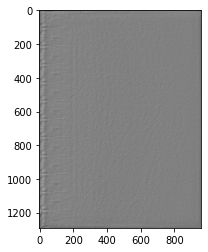

In [16]:
b= (a-np.min(a))/(np.max(a) - np.min(a)) # normalize label [0,1]
plt.figure()
plt.imshow(b*255, cmap="gray")
plt.show()


In [22]:
e=(((diag_img+2))/4*255)

In [23]:
e

array([[ 255.  ,  318.75,  382.5 , ...,  127.5 ,    0.  ,   63.75],
       [ 318.75,  446.25,  446.25, ...,  -63.75,    0.  ,   63.75],
       [ 382.5 ,  382.5 ,  382.5 , ...,    0.  ,    0.  ,    0.  ],
       ...,
       [-255.  , -191.25,  -63.75, ...,    0.  ,    0.  ,    0.  ],
       [-127.5 ,    0.  ,  -63.75, ...,    0.  ,    0.  ,  127.5 ],
       [  63.75,  127.5 ,  127.5 , ...,    0.  ,  127.5 ,  127.5 ]])

In [26]:
f=(((diag_img_test+2))/4)

In [27]:
f

array([[ 4.75, 11.25,  8.75, ..., -1.5 , -1.75,  1.  ],
       [10.  , 13.25,  9.25, ..., -1.75, -1.5 ,  0.75],
       [ 4.5 ,  4.75,  5.5 , ..., -1.5 , -4.25, -3.  ],
       ...,
       [-3.75, -5.  , -1.5 , ...,  3.75, -3.5 , -0.75],
       [-8.25, -4.  , -2.  , ..., -5.5 , -5.25, -3.25],
       [-2.75,  1.  ,  1.25, ..., -2.  , -1.25, -3.5 ]])

In [29]:
ff = 0.5*cvscharrx+0.5*cvscharry

In [31]:
ff.astype(np.uint8)


array([[  0,  90,  96, ..., 148, 106,   0],
       [ 17, 119,  57, ..., 187, 186,  76],
       [ 61, 160, 145, ..., 162,  95, 200],
       ...,
       [ 11, 125, 180, ...,  41, 161, 238],
       [214, 106, 176, ..., 121,  87, 152],
       [  0, 144, 214, ..., 238, 201,   0]], dtype=uint8)

In [47]:
np.uint8(np.absolute(laplacian))

array([[34, 80, 21, ...,  9, 23, 48],
       [ 6, 27,  5, ..., 11, 22,  5],
       [ 4, 19,  4, ...,  8,  1, 11],
       ...,
       [11,  2, 12, ...,  7, 22,  3],
       [ 2, 16, 10, ..., 18, 15,  1],
       [66, 30, 56, ..., 29,  7, 32]], dtype=uint8)

In [48]:
laplacian

array([[ 34.,  80.,  21., ...,   9.,  23.,  48.],
       [  6., -27.,  -5., ..., -11., -22.,   5.],
       [  4., -19.,  -4., ...,   8.,   1.,  11.],
       ...,
       [ 11.,   2., -12., ...,  -7., -22.,   3.],
       [ -2.,  16., -10., ..., -18.,  15.,   1.],
       [ 66.,  30.,  56., ...,  29.,  -7.,  32.]])

In [49]:
np.min(laplacian)

-68.0

In [50]:
np.max(laplacian)

86.0

0.0
1.0


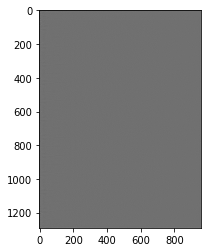

In [54]:
la = (laplacian-np.min(laplacian))/(np.max(laplacian) - np.min(laplacian)) # normalize label [0,1]
print(np.min(la))
print(np.max(la))
plt.figure()
plt.imshow(, cmap="gray")
plt.show()